In [1]:
import urllib.request
import zipfile
import os
import ssl

try:
    os.mkdir("files")
except:
    pass

ssl._create_default_https_context = ssl._create_unverified_context

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

['baby.png', 'countries-of-the-world.csv', 'dialation.png', 'dialation_2.png', 'dog.png', 'dog_noised.png', 'erosion.png', 'erosion_2.png', 'evil_morty_1.png', 'evil_morty_change.png', 'evil_morty_change_3.png', 'evil_morty_change_noised.png', 'evil_morty_segmentation.png', 'ex1.csv', 'ex2.csv', 'koala.png', 'notebook_resources.zip', 'orders_2_2024.csv', 'orders_3_2024.csv', 'orders_4_2024.csv', 'products2.csv', 'ship.png', 'StudentsGrades.csv', 'witcher_1.csv', 'witcher_2.csv', 'woman_noised.png', '__MACOSX']


# עיבוד תמונה

### סינון מערך באמצעות פעולת מיסוך (Masking)

Mask (מסכה) היא **מערך בינארי** שמסמן אילו **מיקומים** ב**מערך אחר באותם המימדים** רלוונטי לשימוש ואילו חלקים צריכים להישאר מוסתרים או מחוץ לחישוב. אפשר לדמיין מערך זה כמו מסננת או שכבה אטומה עם חורים : החורים חושפים חלק מהמידע, בעוד שאר האזורים מכוסים. לדוגמה, אם יש לנו וקטור המייצג סדרה בת 5 איברים `s=np.arange(5)`, אפשר להחזיק "מסכה" באותו אורך (לדוגמא, `m=np.arange(5)%2==0`) שבה המשמעות של ערכי `True` היא שהאיברים שנמצאים באותו מיקום בסדרה שלנו אמורים להכלל בחישוב וערכי False תואמים כאלה שאמורים להתעלם מהם.

בשלב זה יש לנו רק 2 מערכים (בדוגמא שלנו, הסדרה `s` והמערך הבוליאני `m`), ולכן כל שנשאר הוא לבצע את פעולת הMasking באופן הבא: `s[m]`.

ביצוע הMasking יכול לשמש אותנו כדי להחזיר איברים מסוימים בערך שלנו, או כדי לבצע פעולה על איבורים מסוימים במערך.

למטה נבחן כמה דוגמאות נוספות:

בדומה לדוגמא לעיל, התחיל מהגדרת מערך מסדרה כלשהי:

In [9]:
a = np.arange(15)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


כעת נבנה לו Mask

In [10]:
mask = (a%3 == 0)
print(mask)

[ True False False  True False False  True False False  True False False
  True False False]


באמצעות הMask, ניתן להחזיר את האיברים שבמיקומם יש `True` בMask:

In [12]:
print(a[mask])

[ 0  3  6  9 12]


בנוסף, ניתן לעשות פעולות ייחודיות רק על איברים שעברו את הסינון. במקרה של הדוגמא לעיל, להפוך לשליליים את כל האיברים המתחלקים ב3:

In [13]:
a[mask] *= -1
print(a)

[  0   1   2  -3   4   5  -6   7   8  -9  10  11 -12  13  14]


בעיבוד תמונה יש לMasking שימושים רבים מכיוון שניתן באמצעותו לעשות פעולות על איזורים מסוימים בתמונה

בדוגמא להלן, הפונקציה `segment_image` מקבלת תמונה `im_mat` בגווני אפור וערך סף מסוים `th`, ויוצרת תמונה שחור לבן ע"י הפעלת סף (th) על ערכי הבהירות הפיקסלים.  

ננתח יחד כיצד הפעולה מתבצעת:
1. בשורה הראשונה הפונקציה מאתחלת מטריצה חדשה של אפסים (כלומר, מטריצה שונה) בעלת אותו גודל כמו המטריצה המקורית
2. בשורה השניה מתבצע Masking על גבי המטריצה השחורה לפי המיקומים בהם הבהירות בתמונת הקלט הייתה גבוהה מ`th`. פעולת Masking זו משתמשת להשמת הערך 255.
במילים פשוטות, בשורה השניה אנו שמים במטריצה השחורה 255 בכל מקום בו הערך במטריצה המקורית גבוה מ`th`
3. לבסוף, אנו מחזירים את מטריצה החדשה שיצרנו



In [17]:
def segment_image(im_mat, th):
    new_mat = np.zeros(im_mat.shape)
    new_mat[im_mat >= th] = 255
    return new_mat

In [18]:
im_dog = imageio.v3.imread('files/dog.png')
new_image= segment_image(im_dog, 125)
print(new_image)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]]


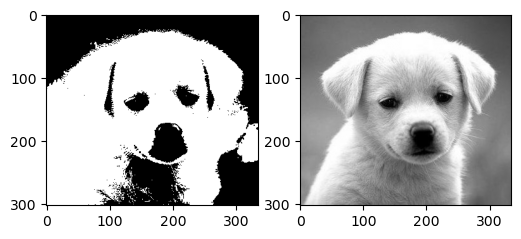

In [21]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.show()

### ביצוע פעולות על מימד/ציר (axis) אחד של המטריצה

ביחידות הקודמות ראינו את מתודת `sum`, הסוכמת את איברי המטריצה. לדוגמא: 

In [32]:
a = np.array([[4, 2 , 5], [1, 3, 1]])
print(a)

[[4 2 5]
 [1 3 1]]


In [ ]:
print(a.sum())

כעת, נניח שנרצה לבצע פעולה זו על מימד אחד של המטריצה.   
לדוגמא, במקום לסכום את כלל איברי המטריצה, נרצה לסכום את השורות או את העמודות בלבד. 

על מנת לעשות זאת, נוכל להשתמש בפרמטר `axis` במתודה `sum`, המייצג את הציר עליו יש המטריצה. עבור מטריצה דו מימדית קיימים 2 ערכים אפשריים: 0 לשורות ו-1 לעמודות

In [31]:
print("axis=0: ", a.sum(axis=0))
print("axis=1: ", a.sum(axis=1))

axis=0:  [3 5 8]
axis=1:  [11  5]


```{admonition} **שימו לב**
:class: warning

במקרה שלנו המשמעות של סכימת השורות/עמודות יכולה מעט להיות לא איטואיטיבית. מה שקורה בפועל הוא שהפעולה מתבצעת בין השורות כאשר `axis=0`, ובין העמודות כאשר `axis=1`.

כך שאם לדוגמא, `axis=0`, נקבל וקטור באורך של שורה בודדת במטריצה המקורית (שזה בעצם מספר העמודות שהיו בה).   
במילים אחרות, ניתן לחשוב על `axis=0` כפעולה הנעשית על האיברים הנמצאים באותו מיקום בין שורות שונות. באופן דומה ניתן לחשוב על פעולות בין האיברים שנמצאים באותו מיקום בעמודות שונות כאשר `axis=1`.

```

נראה כעת דוגמא של שימוש ב`axis` במתודת `sort`:

In [36]:
a = np.array([[4, 2 , 5], [1, 3, 1]])
print("The original array: \n", a)
b = np.sort(a, axis=0) # Return new sorted array. equivalent to the "sorted" built-in function
print("New sorted array with axis=0: \n", b)

The original array: 
 [[4 2 5]
 [1 3 1]]
New sorted array with axis=0: 
 [[1 2 1]
 [4 3 5]]


In [37]:
a.sort(axis=1) # In-place sorting of the array. equivalent to the "sort" method in lists
print("In-place sorting of the array with axis=1: \n",a)

In-place sorting of the array with axis=1: 
 [[2 4 5]
 [1 1 3]]


#### שימוש בפעולות על ציר בהקשר של תמונות

נראה דוגמא בה **נכווץ תמונה לאורך ציר מסוים**

לפניכם הפונקציה `squeeze_image`, המקבלת כקלט את התמונה `m` ומספר שלם `k` המייצג את פקטור הכיווץ.
הפונקציה תחזיר **תמונה חדשה** שבה כל עמודה בתמונה החדשה היא הממוצע של `k` עמודות מהתמונה המקורית.

לדוגמא, עבור תמונה בגודל (10,12) ופקטור 4, תוחזר תמונה בגודל (10,3): 
- העמודה הראשונה בתמונת הפלט תהיה ממוצע העמודות הראשונה עד הרביעית המטריצת הקלט
- העמודה השניה בתמונת הפלט תהיה ממוצע העמודות החמישית עד השמינית המטריצת הקלט
- העמודה הראשונה בתמונת הפלט תהיה ממוצע העמודות ההתשיעית עד השתיים-עשר המטריצת הקלט

ודאו כי אתם מבינים כל שורה בפתרון. נסו להכניס שינויים את הקוד על מנת לוודא כי הבנתם אותו כשורה.

In [39]:
def squeeze_image(im,factor):
    new_n = im.shape[0]
    new_m = im.shape[1] // factor
    new_mat = np.zeros((new_n,new_m))
    for j in range(new_mat.shape[1]):
        curr_range = range(j*factor,min((j+1)*factor,im.shape[1]))
        new_mat[:,j] = im[:,curr_range].mean(axis=1)
    return new_mat

In [40]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = squeeze_image(im_dog,4)

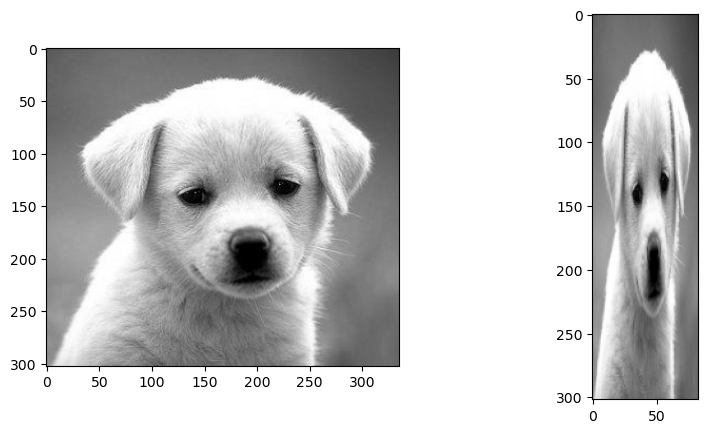

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

Slide 12

### הכהיית תמונה

בחנו את המימוש ואת תוצאת המתודה `dark_strength` המקבלת תמונה ומחזירה אותו כהה יותר בכמות יחידות הבהירות שהועברו ב-`dark_strength`

In [47]:
def darken_image(im,dark_strength=150):
    dark_im = im.copy()
    dark_im = im-dark_strength
    return dark_im

In [48]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,100)

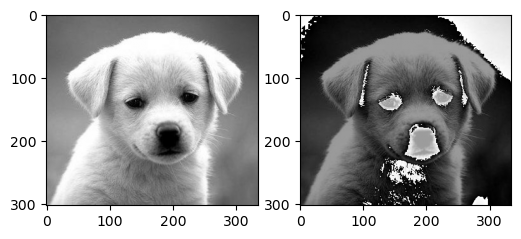

In [49]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

#### למה קיבלנו ערכים בהירים לא צפויים?

זכרו שמכיוון שאנו עובדים על תמונות, הטיפוס של איברי המטריצה המייצגת את התמונה הוא `uint8`. לכן הערכים חייבים להיות בטווח **0–255**.  
כאשר פעולה חשבונית נותנת תוצאה מחוץ לטווח הזה, מתרחשת **גלישה מספרית (numerical overflow)**. המשמעות היא שמבצעים מודולו (`%`) 256 על מנת "להחזיר" אך הערך חזרה לטווח שבין 0 ל255. כלומר,
- אם התוצאה גדולה מ־255 - הערך "מתגלגל" חזרה מההתחלה .  
- אם התוצאה מעט שלילית - הערך "מתגלגל" ויוצר בהירות לא צפויה.

בחנו את הדוגמאות הבאות וודאו כי הבנתם מדוע מקבלים את הערכים המודפסים:

In [50]:
print(np.uint8(246) + np.uint8(20))

10


/tmp/ipykernel_6084/356383855.py:1: RuntimeWarning: overflow encountered in scalar add
  print(np.uint8(246) + np.uint8(20))


In [51]:
print(np.uint8(10) - np.uint8(20))

246


/tmp/ipykernel_6084/976938613.py:1: RuntimeWarning: overflow encountered in scalar subtract
  print(np.uint8(10) - np.uint8(20))


כדי לפתור את הבעיה, נמיר את הטיפוסים לטיפוס `int` רגיל **לפני** ביצוע הפעולה באמצעות `np.int_`:  

In [54]:
a = np.uint8(10)
b = np.uint8(20)
c = np.int_(a) - np.int_(b)
print(c, type(c))

-10 <class 'numpy.int64'>


כעת נוכל להגדיר שכל ערך מתחת ל0 יקבל 0 וכל ערך שמעל 255 יוחלף ב255. על מנת לעשות זאת במטריצה נשתמש בפונקציה `(mat, a)np.maximum`, המחזירה מטריצה חדשה בה עבור כל איבר במטריצה `mat` נלקח הערך המקסימלי בין האיבר ל`a`

להלן מימוש `darken_image` לאחר התיקון:

In [59]:
def darken_image(im,dark_strength):
    dark_im = im.copy()
    dark_im = np.maximum(np.int_(im)-dark_strength,0)
    return np.uint8(dark_im) # Do not forget to convert back to uint8 to save memory!

In [57]:
im_dog = imageio.v3.imread('files/dog.png')
new_image = darken_image(im_dog,150)

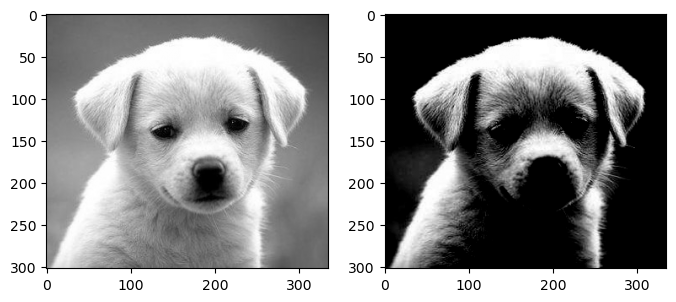

In [58]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.show()

### Image noising

Lets say we want to add random noise an image, maybe in order to confuse a face detection algorithm.

### רעש בתמונה (Image Noising)

**מה זה רעש בתמונה?**  
רעש בתמונה הוא מצב בו חלק מהפיקסלים סוטים מערכם האמיתי. אפשר להסתכל על רעש גם כתוספת של ערכים אקראיים לפיקסלים.  
התוצאה נראית כמו "גרגירים" או נקודות בהירות או כהות שמפוזרות על פני התמונה.  

**מתי זה קורה?**  
- באופן טבעי: רעש יכול להופיע בצילום אמיתי בגלל חיישן מצלמה לא יציב, תאורה חלשה, או הפרעות אלקטרוניות.  
- באופן מלאכותי: מוסיפים רעש במכוון, למשל כחלק מניסויים בעיבוד תמונה. למשל, כדי לבדוק על כמה האלגוריתם יודע לזהות אובייקטים בתמונות רועשות.  

כעת נראה איך אפשר **להוסיף רעש אקראי לתמונה** בעזרת NumPy.


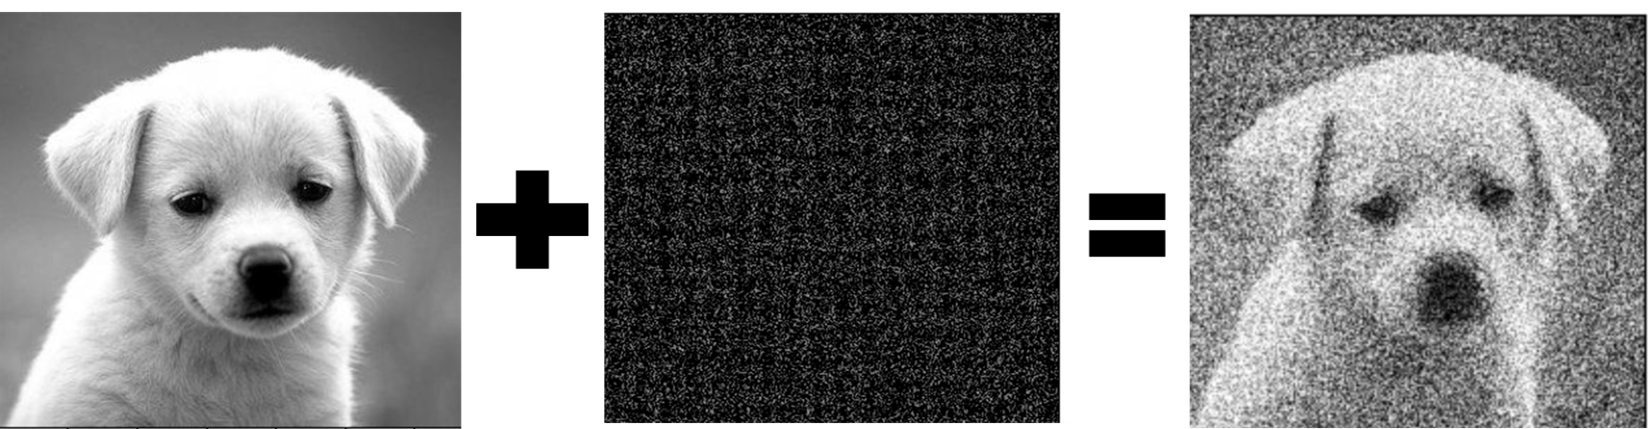

נראה כעת דוגמא לרעש ומתווסף לתמונה אחידה אפורה ברמת בהירות 100. הרעת מוסיף את ערך הבהירות בערך אקראי בין 0 ל50

In [91]:
def bright_noise_im(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = im + noise # np.clip(im + noise, 0, 255)
    return noisy_image

In [92]:
im = np.ones((100,100), dtype=np.uint8)*125 # plt.imread('files/dog.png')
new_image = bright_noise_im(im,50)

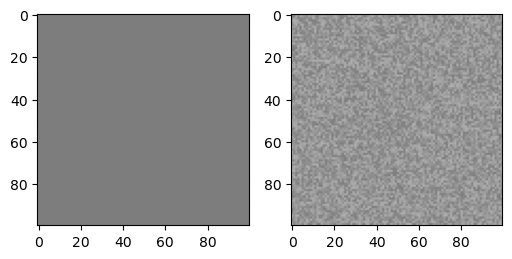

In [93]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(new_image,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

ננסה כעת להוסיף את הרעש לתמונת הכלכלב שלנו

In [96]:
im_dog = imageio.v3.imread('files/dog.png')
# noisy_image_no_overflow = noise_im_no_overflow(im_dog,50)
bright_noisy_image = bright_noise_im(im_dog,100)

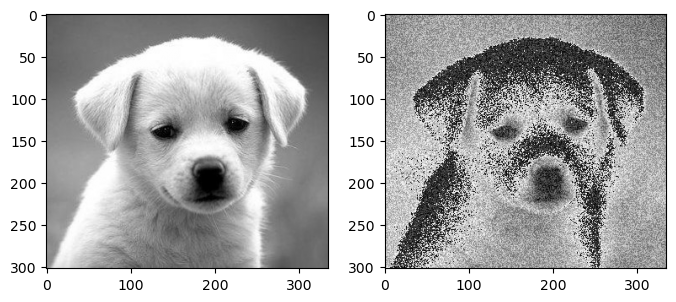

In [97]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(bright_noisy_image,vmin=0, vmax=255, cmap=plt.cm.gray)

מה קרה לנו כאן? נראה שחלק מהפיקסלים שהיו במקור בהירים היו מאוד כהים.

כמו בדוגמא של הכהיית התמונה, גם פה התרחשה גלישה מספרית (Numerical overflow). 

על מנת לתקן זאת, נוכל, כמו קודם להגביל את טווח המספרים כה שיהיה בין 0 ל-255. הפעם נעשה זאת באמצעות המתודה `np.clip`, התוחמת את ערכים מערך נתון בין 2 ערכים (קראו עליה ברחבה [פה](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)):

In [98]:
def bright_noise_im_no_overflow(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8)
    noisy_image = np.clip(np.int_(im) + np.int_(noise), 0, 255) # This is the modified line, where we clip the values to range between 0 to 255
    return noisy_image

מה לגבי רעש יכול להיות להכהות או להביר כל פיקסל? 

מכיוון שאנו משתמשים ב`clip`, אנו למעשה תוחמים את ערכים גם מלעלה וגם ולמטה.    
לכן, עלינו לשנות רק את טווח הרעש:

In [109]:
def noise_im(im,noise_strength=100):
    noise_im = im.copy()
    noise = np.random.randint(0, noise_strength + 1, size=im.shape, dtype=np.uint8) 
    noisy_image = np.clip(np.int_(im)+noise-noise_strength//2, 0, 255)
    return noisy_image

המימוש שלנו **הזיז** את טווח המספרים מהם הוגרל ורעש מ0 עד `noise_strength+1` ל`-noise_strength//2` עד `noise_strength//2` ועבר בקלט (`noise_strength`).

כך שלדוגמא, עבור הקלט `noise_strength=100`  הרעש שיתווסף לתמונה יהיה בין `-50` ל`50`

In [110]:
im_dog = imageio.v3.imread('files/dog.png')
noisy_im = noise_im(im_dog,100)

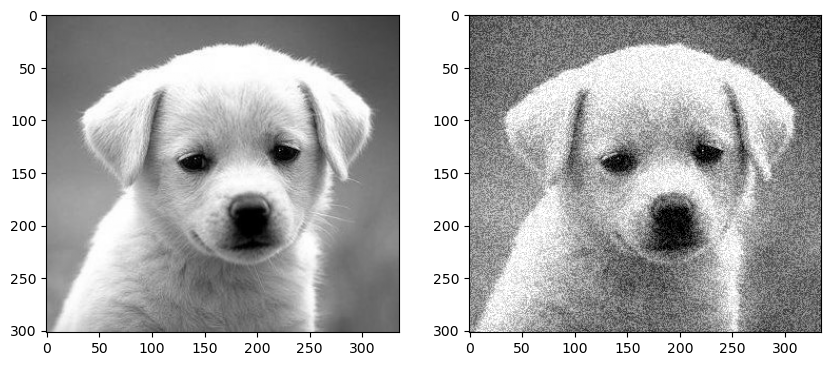

In [111]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(noisy_im,vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()